In [1]:
# Import libraries 
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
import matplotlib 
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Users\\Megan\\Documents\\Analytics\\Gun Violence Achievement 6\\03 Scripts'

In [3]:
os.getcwd()[-10:]

'03 Scripts'

In [4]:
os.getcwd()[:-10]

'C:\\Users\\Megan\\Documents\\Analytics\\Gun Violence Achievement 6\\'

In [5]:
# Create path 
path = os.getcwd()[:-10]

In [6]:
# Import dataframe 
df = pd.read_csv(os.path.join(path, '02 Data','Raw Data','violence_new.csv'), index_col = False)

In [7]:
df.columns

Index(['Unnamed: 0', 'Incident_id', 'Date', 'State', 'City_or_County',
       '#_killed', '#_injured', 'latitude', 'longitude', 'n_guns_involved',
       'participant_age_group', 'participant_gender'],
      dtype='object')

In [8]:
# Drop unnamed column 
df = df.drop(columns = ['Unnamed: 0'])

In [9]:
df.head()

,Incident_id,Date,State,City_or_County,#_killed,#_injured,latitude,longitude,n_guns_involved,participant_age_group,participant_gender
0,461105,1/1/2013,Pennsylvania,Mckeesport,0,4,40.3467,-79.8559,1.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female
1,460726,1/1/2013,California,Hawthorne,1,3,33.9090,-118.3330,1.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male
2,478855,1/1/2013,Ohio,Lorain,1,3,41.4455,-82.1377,2.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male
3,478925,1/5/2013,Colorado,Aurora,4,0,39.6518,-104.8020,1.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male
4,478959,1/7/2013,North Carolina,Greensboro,2,2,36.1140,-79.9569,2.0,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female


### 02. Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.

In [10]:
# Create subset for necessary data 
sub = df[['Date','State','#_killed','#_injured','n_guns_involved','latitude','longitude']]

In [11]:
sub

,Date,State,#_killed,#_injured,n_guns_involved,latitude,longitude
0,1/1/2013,Pennsylvania,0,4,1.0,40.3467,-79.8559
1,1/1/2013,California,1,3,1.0,33.9090,-118.3330
2,1/1/2013,Ohio,1,3,2.0,41.4455,-82.1377
3,1/5/2013,Colorado,4,0,1.0,39.6518,-104.8020
4,1/7/2013,North Carolina,2,2,2.0,36.1140,-79.9569
...,...,...,...,...,...,...,...
230790,3/31/2018,Washington,0,0,1.0,47.6638,-117.2350
230791,3/31/2018,Louisiana,1,0,1.0,31.7537,-93.0836
230792,3/31/2018,Louisiana,0,1,1.0,29.9239,-90.0442
230793,3/31/2018,Texas,1,0,1.0,29.7201,-95.6110


In [12]:
# Look at correlation coefficients
sub.corr()

,#_killed,#_injured,n_guns_involved,latitude,longitude
#_killed,1.000000,-0.120808,-0.042565,-0.080130,-0.062864
#_injured,-0.120808,1.000000,-0.062033,-0.011237,0.036450
n_guns_involved,-0.042565,-0.062033,1.000000,0.025085,-0.004463
latitude,-0.080130,-0.011237,0.025085,1.000000,-0.056232
longitude,-0.062864,0.036450,-0.004463,-0.056232,1.000000


### 03. Create correlated heatmap using Seaborn 

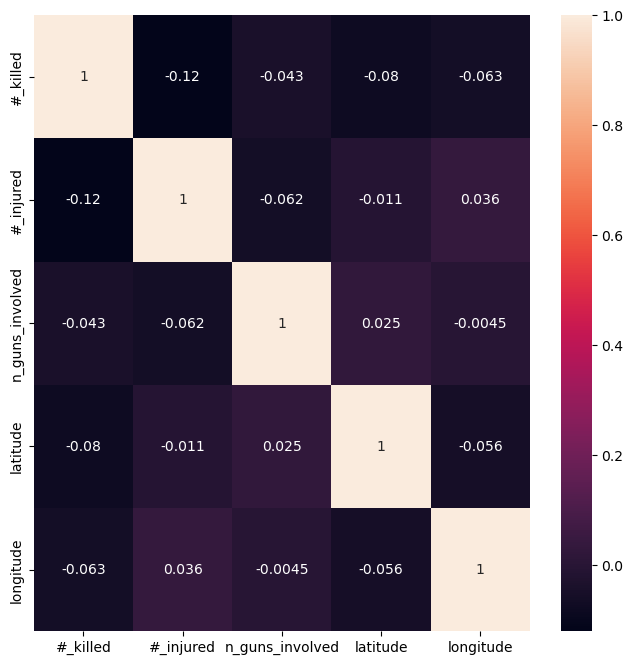

In [13]:
# Create a subplot with matplotlib 
f,ax = plt.subplots(figsize=(8,8)) 

# Create correlation heatmap 
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

#### There are no significant correlations between any of these variables 

### 04.Create scatterplots to look at relationships between variables 

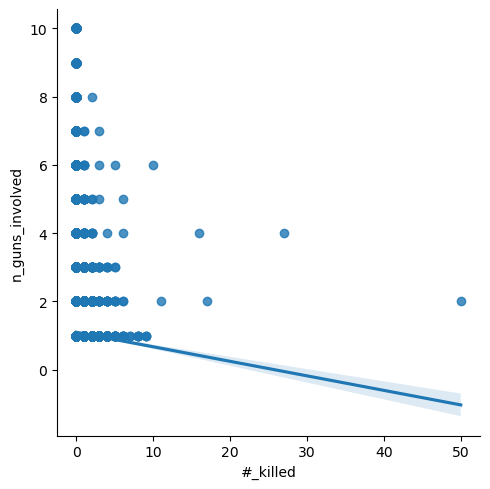

In [14]:
sns.lmplot(x = '#_killed', y = 'n_guns_involved', data = sub)

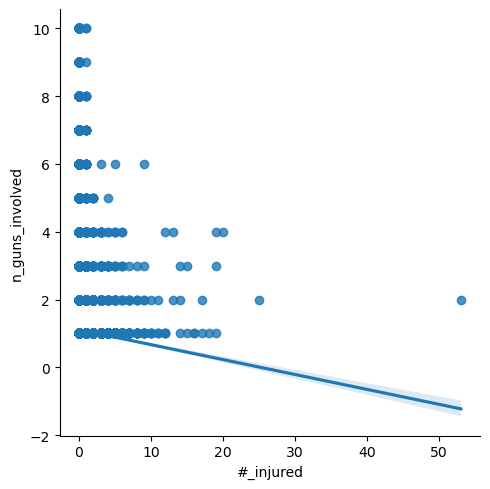

In [15]:
sns.lmplot(x = '#_injured', y = 'n_guns_involved', data = sub)

#### According to these scatterplots, there is so significant correlation between the number of guns involved and the number of injured and killed. At first glance, the scatterplots may suggest that more people are killed when fewer guns are involved, but there is a significantly higher number of incidents with only 1-2 guns involved, which accounts for the uneven distribution. 

In [16]:
df.columns

Index(['Incident_id', 'Date', 'State', 'City_or_County', '#_killed',
       '#_injured', 'latitude', 'longitude', 'n_guns_involved',
       'participant_age_group', 'participant_gender'],
      dtype='object')

### 05. Create a pair plot of the entire data set

In [17]:
# Create subset for pair plot 
sub_2 = df[['State','City_or_County','#_killed','latitude','longitude','#_injured','n_guns_involved']]

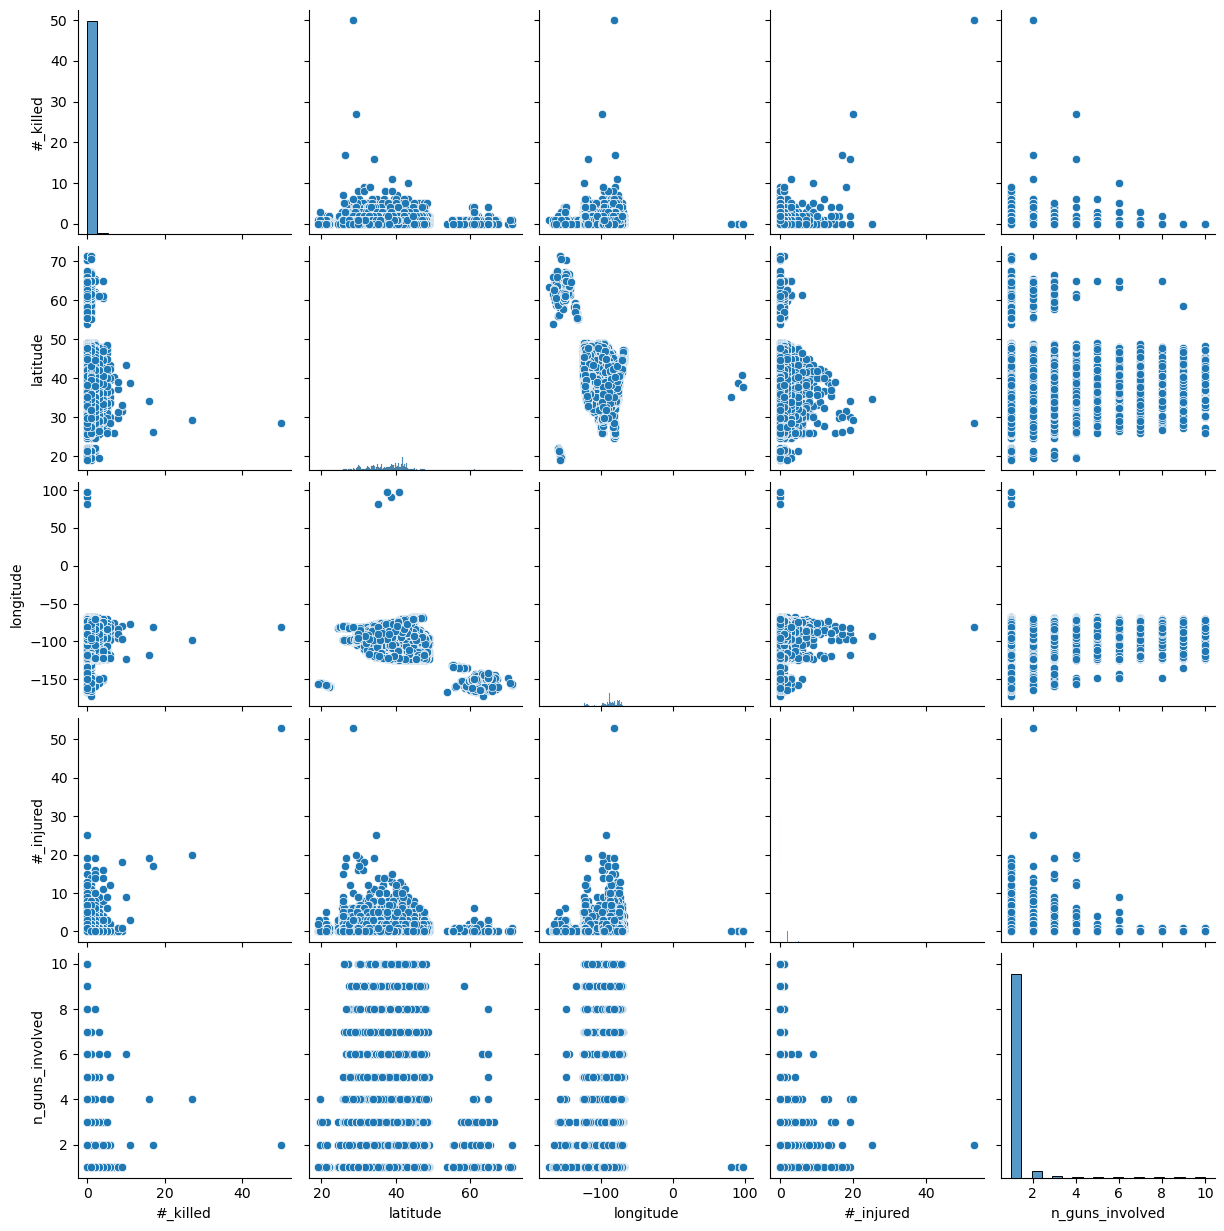

In [18]:
a = sns.pairplot(sub_2)

#### According to the pair plot, there are some incorrectly recorded longitude records that need to be investigated. The most interesting visualizations are those relating to the number injured, the number killed and the number of guns involved. These loosely show that more people are injured and killed the fewer guns that are involved. This, of course, could not indicate a causal relationship. It happens that more incidents occur with fewer guns involved, which can make the scatterplots look a bit deceiving. 

In [19]:
# Create subset for longitude column outliers 
Long_outliers = df.loc[df['longitude'] > 0]

In [20]:
# Check output 
Long_outliers.head()

,Incident_id,Date,State,City_or_County,#_killed,#_injured,latitude,longitude,n_guns_involved,participant_age_group,participant_gender
211792,989590,11/15/2017,Missouri,St Louis,0,0,38.7487,90.3700,1.0,NaN,NaN
217372,1012331,12/22/2017,North Carolina,Charlotte,0,0,35.2137,80.9491,1.0,NaN,NaN
229582,1075419,3/20/2018,Nebraska,Lincoln,0,0,40.8509,96.7591,1.0,NaN,NaN
230155,1081194,3/25/2018,Kansas,Wichita,0,0,37.6499,97.4331,1.0,NaN,NaN
230587,1081193,3/29/2018,Kansas,Wichita,0,0,37.6499,97.4331,1.0,NaN,NaN


In [21]:
Long_outliers.shape

(5, 11)

In [22]:
Long_outliers['State'].value_counts()

Kansas            2
Missouri          1
North Carolina    1
Nebraska          1
Name: State, dtype: int64

In [23]:
# Create subset eliminating the longitude outliers 

df_new = df.loc[df['longitude'] <0]

### Create a categorical plot 

Text(0.5, 1.0, 'Distribution of Gun Violence by Latitude')

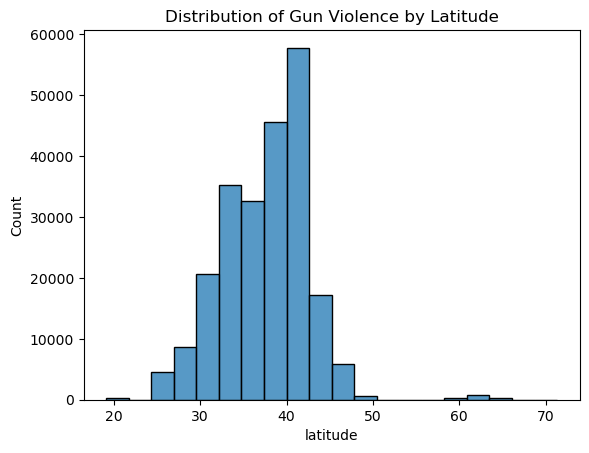

In [24]:
# Look at latitude and longitude histograms to interpret geographic information 
sns.histplot(df_new['latitude'], bins = 20) 
plt.title('Distribution of Gun Violence by Latitude')

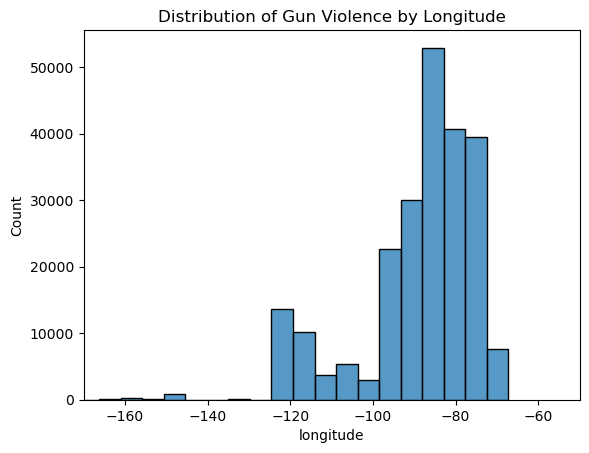

In [25]:
fig, ax = plt.subplots()
sns.histplot(df_new['longitude'], bins = 20) 
ax.set_xlim(-170,-50)
plt.title('Distribution of Gun Violence by Longitude')
plt.show() 

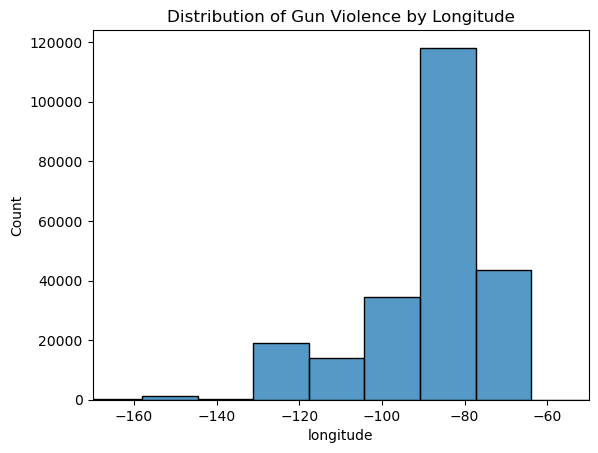

In [26]:
# Limit x axis in histogram to remove longitude errors/outliers
fig, ax = plt.subplots()
sns.histplot(df['longitude'], bins = 20) 
ax.set_xlim(-170,-50)
plt.title('Distribution of Gun Violence by Longitude')
plt.show() 

In [27]:
df_new.columns

Index(['Incident_id', 'Date', 'State', 'City_or_County', '#_killed',
       '#_injured', 'latitude', 'longitude', 'n_guns_involved',
       'participant_age_group', 'participant_gender'],
      dtype='object')

In [28]:
# Use longitudes to create general U.S. categorical regions 
df_new.loc[df_new['longitude'] < -105.00, 'Geographic_Region'] = 'West'

C:\Users\Megan\AppData\Local\Temp\ipykernel_16016\1084810576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.loc[df_new['longitude'] < -105.00, 'Geographic_Region'] = 'West'


In [29]:
df_new.loc[(df_new['longitude'] >= -105.00) & (df['longitude'] < -84.00), 'Geographic_Region'] = 'Middle' 

In [30]:
df_new.loc[df_new['longitude'] >= -84.00, 'Geographic_Region'] = 'East'

In [31]:
df_new['Geographic_Region'].value_counts(dropna = False)

Middle    101654
East       96972
West       32164
Name: Geographic_Region, dtype: int64

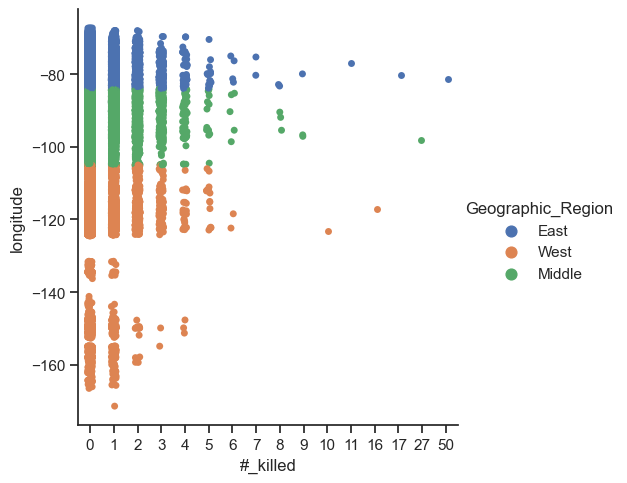

In [32]:
# Create a categorical plot based on the Geographic regions above
sns.set(style="ticks")
g = sns.catplot(x="#_killed", y="longitude", hue="Geographic_Region", data=df_new)

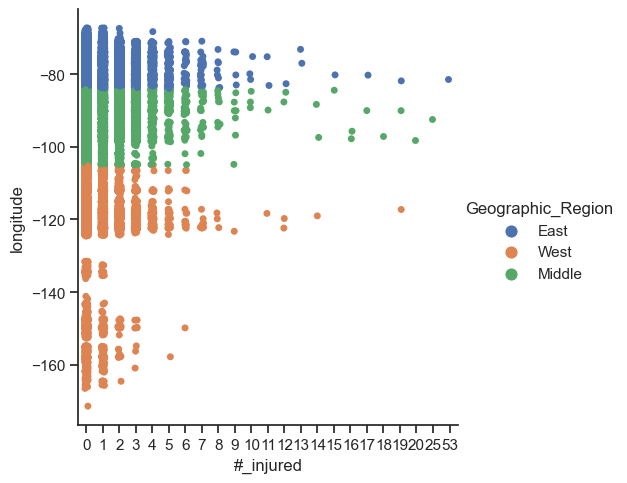

In [33]:
sns.set(style = 'ticks') 
h = sns.catplot(x='#_injured', y='longitude', hue='Geographic_Region', data=df_new)

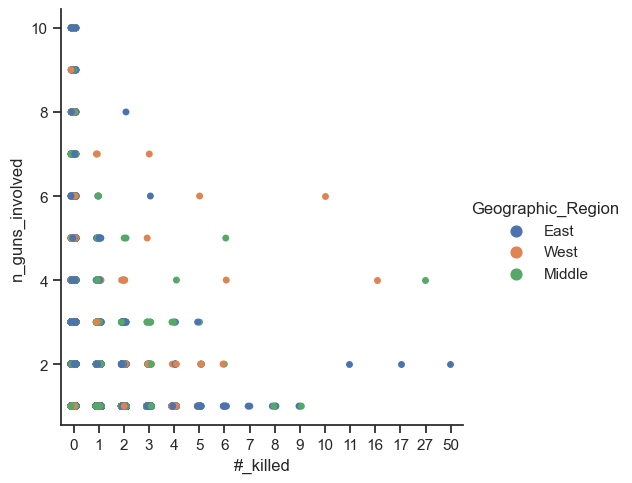

In [34]:
# Create cat plot comparing number of guns to number of people killed 

sns.set(style = 'ticks') 
i = sns.catplot(x='#_killed', y='n_guns_involved', hue='Geographic_Region', data=df_new)

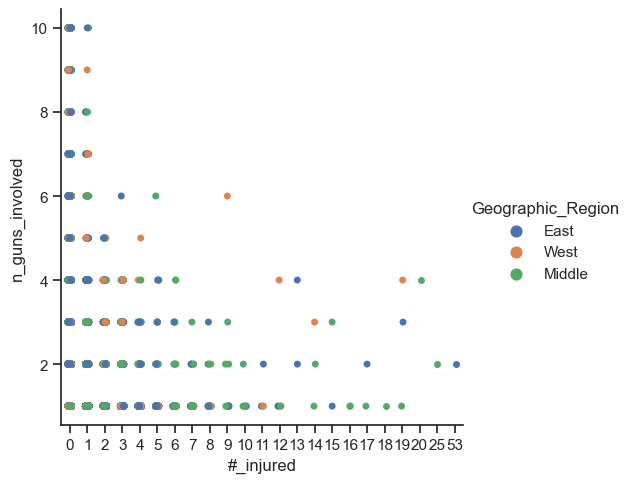

In [35]:
sns.set(style = 'ticks') 
i = sns.catplot(x='#_injured', y='n_guns_involved', hue='Geographic_Region', data=df_new)

#### According to these catplots, there are generally more people killed and/or injured by gun violence in the Eastern and Middle regions of the U.S.

### 07. The catplots created for geographic region help to answer my question about the occurence of gun violence based on population. More people live in the Middle and Eastern U.S., so it follows that more gun violence would exist in these areas. I still need to compare with U.S. census data in order to further prove this hypothesis. 

In [36]:
# Export dataframe 
df_new.to_csv(os.path.join(path, '02 Data','Raw Data','Geo_region_data.csv'))